In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import misc
import glob
from sklearn import manifold
from sklearn.decomposition import PCA
import matplotlib.pyplot as PLT
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib._png import read_png
import seaborn as sns
import pandas as pd

In [3]:
samples = []

for filename in glob.glob('/Users/ilanman/Downloads/coil-20-unproc/obj2__*.png'): 
    img = misc.imread(filename, mode='I')
    # the following line changed
    samples.append(img.reshape(-1))

df = pd.DataFrame.from_records(samples, coerce_float=True)

# perform Isomap
iso = manifold.Isomap(n_neighbors=2, n_components=2)
iso.fit_transform(df)
to_plot = np.column_stack([iso.embedding_.T[0],iso.embedding_.T[1]])

# perform PCA
clf = PCA(n_components=2)
X, Y = clf.fit_transform(df).T[0], clf.fit_transform(df).T[1]

In [10]:
img[img==203]

array([203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
       203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 20

In [278]:
img.shape

(416, 448)

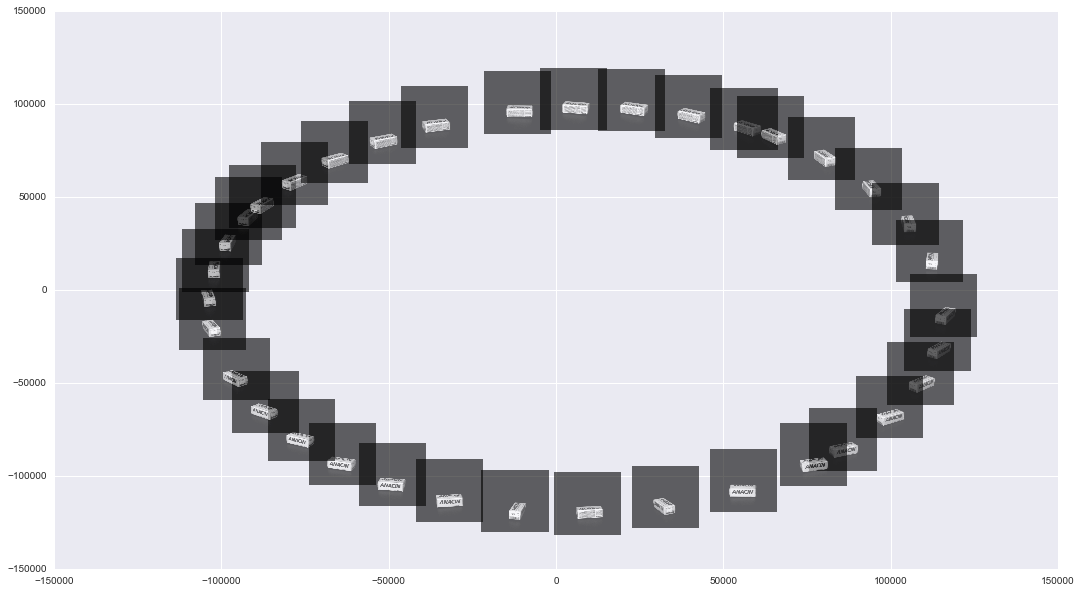

In [5]:
plt.figure(figsize=(18,10))
ax = PLT.subplot(111)

for i in range(len(iso.embedding_))[::2]:
    # add a first image
    arr_hand = read_png('/Users/ilanman/Downloads/coil-20-unproc/obj2__{}.png'.format(i))
    imagebox = OffsetImage(arr_hand, zoom=.15, alpha=0.6, cmap='gray')
    xy = to_plot[i]               # coordinates to position this image
#    xy = np.column_stack([X,Y])[i]               # coordinates to position this image

    ab = AnnotationBbox(imagebox, xy, frameon=False,
        xybox=(0., 0.),
        xycoords='data',
        boxcoords="offset points")                                  
    ax.add_artist(ab)

plt.scatter(to_plot.T[0], to_plot.T[1], alpha = 0)
#plt.scatter(X,Y, alpha=0)

plt.show()


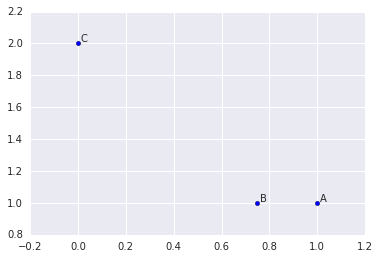

In [280]:
plt.scatter([1,0,0.75],[1,2,1])
plt.text(1.01,1.01,"A")
plt.text(0.01,2.01,"C")
plt.text(0.76,1.01,"B")
plt.savefig("points.png")
plt.show()